In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("oakridge international.csv")

In [ ]:
df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  
0  The Oakridge summer camp was a hit with our ch...  
1  Absolutely thrilled with Oakridge School's sum...  
2  Very well organized  at oakridge international...  
3  I am delighted to express my utmost satisfacti...  
4  My son is attending summer camp this year at O...

In [ ]:


df['cleaned']=df.loc[:,'user_text']

In [ ]:
df['cleaned'].isnull().sum()

122

In [ ]:
df=df.dropna(subset=['cleaned'])

In [ ]:
 df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates()

In [ ]:
len(df['cleaned'])

365

In [ ]:
df['cleaned'][364]

'oigv bjvnlh koojnkp'

In [ ]:
 df = df.drop(index=364)

In [ ]:
import re

def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")


    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x:preprocess(x))

In [ ]:
def regularex(text):
    import re
    # Pattern to remove colons  between the words, extra spaces, single-character words, and two-character words,line break(\n)
    reg = re.compile(r':|\b\w{1,2}\b|\s{2,}|\n')

    # Applying the regex substitution to each element in the cleaned text column
    text = reg.sub(' ', text).strip()
    return text

#removing of numerical values
def remove_num(text):
    reg=re.compile('\d')
    text=reg.sub('',text)
    return text

# needed to remove extra spaces
def extraspace(text):
    import re
    # Pattern to remove extra spaces
    reg = re.compile(r'\s{2,}')

    # Applying the regex substitution to each element in the cleaned text column
    text = reg.sub(' ', text).strip()
    return text

In [ ]:
print(df['user_text'][2])
print('\n')
print(df['cleaned'][2])

Very well organized  at oakridge international  school. My child liked the archery, tapes and tunes and swimming activities.
Lunch and transportation was good.

Stargazing stands out and big shout out to the team for organizing and helping kids understand basics.

Kudos to the team and Mary mam for taking care of kids so well.


very well organized at oakridge international school  my child liked the archery  tapes and tunes and swimming activities  lunch and transportation was good  stargazing stands out and big shout out to the team for organizing and helping kids understand basics  kudos to the team and mary mam for taking care of kids so well


In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x:remove_num(x))
df['cleaned']=df['cleaned'].apply(lambda x:regularex(x))
df['cleaned']=df['cleaned'].apply(lambda x:extraspace(x))

In [ ]:
print(df['user_text'][4])
print('\n')
print(df['cleaned'][4])

My son is attending summer camp this year at Oakridge campus, Bachupally. He is thoroughly enjoying the summer camp and busy in making new friends 😉. We sincerely thank the Oakridge summer camp management team for their seamless support right from the start and arranging all necessary things. Special thanks to Mary madam for her continuous support. Even, we parents enjoyed the star gazing night arranged in the last week.


son attending summer camp this year oakridge campus bachupally thoroughly enjoying the summer camp and busy making new friends sincerely thank the oakridge summer camp management team for their seamless support right from the start and arranging all necessary things special thanks mary madam for her continuous support even parents enjoyed the star gazing night arranged the last week


In [ ]:
!pip install emoji

In [ ]:
pip install --upgrade typing_extensions

In [ ]:
#removing text with their meaning
import emoji
df['cleaned']=df['cleaned'].apply(lambda x:emoji.demojize(x))

In [ ]:
df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  \
0  The Oakridge summer camp was a hit with our ch...   
1  Absolutely thrilled with Oakridge School's sum...   
2  Very well organized  at oakridge international...   
3  I am delighted to express my utmost satisfacti...   
4  My son is attending summer camp this year at O...   

                                             cleaned  
0  the oakridge summer camp was hit with our chil...  
1  absolutely thrilled with oakridge school summe...  
2  very well organized oakridge international sch...  
3  delighted express utmost satisfaction with oak...  
4  son attending summer camp this year oakridge c...

In [ ]:
import string
string.punctuation

exclude=string.punctuation

In [ ]:
# def remove_punc(text):
#     for char in exclude:
#         text=text.replace(char,'')
#     return text

def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x:remove_punc1(x))

In [ ]:
print(df['user_text'][0])
print('\n')
print(df['cleaned'][0])

The Oakridge summer camp was a hit with our child! Early mornings were no problem thanks to the exciting activities and hands-on learning. From swimming to archery, dance to STEM, the camp kept her engaged and energized all day long. The fun didn't stop at pick-up; she loved recounting her adventures with friends and teachers, keeping the excitement alive. We're all bummed the program is ending soon – it flew by!
A big thank you to the entire team for creating such a well-rounded and engaging program. The planning, transportation, food, and activities were all fantastic. We especially appreciate Vinaya mam's patience and care for the children throughout the camp.
We hope to see more programs like this in the future!


the oakridge summer camp was hit with our child early mornings were problem thanks the exciting activities and hands learning from swimming archery dance stem the camp kept her engaged and energized all day long the fun did not stop pick she loved recounting her adventure

In [ ]:
df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  \
0  The Oakridge summer camp was a hit with our ch...   
1  Absolutely thrilled with Oakridge School's sum...   
2  Very well organized  at oakridge international...   
3  I am delighted to express my utmost satisfacti...   
4  My son is attending summer camp this year at O...   

                                             cleaned  
0  the oakridge summer camp was hit with our chil...  
1  absolutely thrilled with oakridge school summe...  
2  very well organized oakridge international sch...  
3  delighted express utmost satisfaction with oak...  
4  son attending summer camp this year oakridge c...

In [ ]:
!pip install nltk


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x:remove_stopwords(x))

In [ ]:
print(df['user_text'][0])
print('\n')
print(df['cleaned'][0])
print('\n')
print(df['user_text'][1])
print('\n')
print(df['cleaned'][1])
print('\n')
print(df['user_text'][2])
print('\n')
print(df['cleaned'][2])
print('\n')
print(df['user_text'][3])
print('\n')
print(df['cleaned'][3])
print('\n')

The Oakridge summer camp was a hit with our child! Early mornings were no problem thanks to the exciting activities and hands-on learning. From swimming to archery, dance to STEM, the camp kept her engaged and energized all day long. The fun didn't stop at pick-up; she loved recounting her adventures with friends and teachers, keeping the excitement alive. We're all bummed the program is ending soon – it flew by!
A big thank you to the entire team for creating such a well-rounded and engaging program. The planning, transportation, food, and activities were all fantastic. We especially appreciate Vinaya mam's patience and care for the children throughout the camp.
We hope to see more programs like this in the future!


 oakridge summer camp  hit   child early mornings  problem thanks  exciting activities  hands learning  swimming archery dance stem  camp kept  engaged  energized  day long  fun   stop pick  loved recounting  adventures  friends  teachers keeping  excitement alive   bumme

In [ ]:
# Install spaCy and download the language model
!pip install spacy
!python -m spacy download en_core_web_sm

# Import necessary libraries
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:

# Define a function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Apply the lemmatization function to the DataFrame
df['cleaned'] = df['cleaned'].apply(lemmatize_text)

# Display the DataFrame
print(df)


    user_review_no   rating      time_ago  comment_likes  \
0      73 reviews   5 stars   a month ago            NaN   
1          1 photo  5 stars   a month ago            NaN   
2          1 photo  5 stars   a month ago            NaN   
3          1 photo  5 stars  6 months ago            2.0   
4              NaN  5 stars   a month ago            NaN   
..             ...      ...           ...            ...   
359            NaN  5 stars   7 years ago            NaN   
360   642 reviews   5 stars   4 years ago            NaN   
361   152 reviews   5 stars   4 years ago            1.0   
362     6 reviews   5 stars    a year ago            NaN   
363            NaN  5 stars    a year ago            NaN   

                                             user_text  \
0    The Oakridge summer camp was a hit with our ch...   
1    Absolutely thrilled with Oakridge School's sum...   
2    Very well organized  at oakridge international...   
3    I am delighted to express my utmost satisf

In [ ]:
print(df['user_text'][0])
print('\n')
print(df['cleaned'][0])
print('\n')
print(df['user_text'][1])
print('\n')
print(df['cleaned'][1])
print('\n')
print(df['user_text'][2])
print('\n')
print(df['cleaned'][2])
print('\n')
print(df['user_text'][3])
print('\n')
print(df['cleaned'][3])
print('\n')

The Oakridge summer camp was a hit with our child! Early mornings were no problem thanks to the exciting activities and hands-on learning. From swimming to archery, dance to STEM, the camp kept her engaged and energized all day long. The fun didn't stop at pick-up; she loved recounting her adventures with friends and teachers, keeping the excitement alive. We're all bummed the program is ending soon – it flew by!
A big thank you to the entire team for creating such a well-rounded and engaging program. The planning, transportation, food, and activities were all fantastic. We especially appreciate Vinaya mam's patience and care for the children throughout the camp.
We hope to see more programs like this in the future!


  oakridge summer camp   hit    child early morning   problem thank   exciting activity   hand learn   swimming archery dance stem   camp keep   engage   energize   day long   fun    stop pick   love recounting   adventure   friend   teacher keep   excitement alive    bum

In [ ]:
df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  \
0  The Oakridge summer camp was a hit with our ch...   
1  Absolutely thrilled with Oakridge School's sum...   
2  Very well organized  at oakridge international...   
3  I am delighted to express my utmost satisfacti...   
4  My son is attending summer camp this year at O...   

                                             cleaned  
0    oakridge summer camp   hit    child early mo...  
1  absolutely thrilled   oakridge school summer c...  
2    well organize oakridge international school ...  
3  delight express utmost satisfaction   oakridge...  
4  son attend summer camp   year oakridge campus ...

# Word cloud


In [ ]:
joined_text = ' '.join(df['cleaned'].apply(str))
print(joined_text)

  oakridge summer camp   hit    child early morning   problem thank   exciting activity   hand learn   swimming archery dance stem   camp keep   engage   energize   day long   fun    stop pick   love recounting   adventure   friend   teacher keep   excitement alive    bum   program end soon fly big thank    entire team   create   well rounded   engage program   planning transportation food   activity    fantastic especially appreciate vinaya mam patience   care    child throughout   camp hope see   program like    future absolutely thrilled   oakridge school summer camp bachupally son   blast   eagerly share   learn   dance step art   craft steam class   even sport like swimming   basketball special mention   stargazing activity parent get enjoy see saturn ring    moon close alongside   kids transportation   food   top notch impress    overall organization   well organize oakridge international school child like   archery tape   tune   swimming activity lunch   transportation   good st

In [ ]:
len(joined_text)

113177

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenizing the text
tokens = word_tokenize(joined_text)
print(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['oakridge', 'summer', 'camp', 'hit', 'child', 'early', 'morning', 'problem', 'thank', 'exciting', 'activity', 'hand', 'learn', 'swimming', 'archery', 'dance', 'stem', 'camp', 'keep', 'engage', 'energize', 'day', 'long', 'fun', 'stop', 'pick', 'love', 'recounting', 'adventure', 'friend', 'teacher', 'keep', 'excitement', 'alive', 'bum', 'program', 'end', 'soon', 'fly', 'big', 'thank', 'entire', 'team', 'create', 'well', 'rounded', 'engage', 'program', 'planning', 'transportation', 'food', 'activity', 'fantastic', 'especially', 'appreciate', 'vinaya', 'mam', 'patience', 'care', 'child', 'throughout', 'camp', 'hope', 'see', 'program', 'like', 'future', 'absolutely', 'thrilled', 'oakridge', 'school', 'summer', 'camp', 'bachupally', 'son', 'blast', 'eagerly', 'share', 'learn', 'dance', 'step', 'art', 'craft', 'steam', 'class', 'even', 'sport', 'like', 'swimming', 'basketball', 'special', 'mention', 'stargazing', 'activity', 'parent', 'get', 'enjoy', 'see', 'saturn', 'ring', 'moon', 'close',

In [ ]:
freq=nltk.FreqDist(tokens)

In [ ]:
most_common=freq.most_common(30)

In [ ]:
most_common

[('school', 634),
 ('oakridge', 345),
 ('teacher', 261),
 ('child', 247),
 ('kid', 231),
 ('good', 189),
 ('student', 159),
 ('year', 142),
 ('bachupally', 126),
 ('international', 119),
 ('activity', 113),
 ('class', 112),
 ('parent', 111),
 ('daughter', 110),
 ('happy', 109),
 ('experience', 101),
 ('well', 100),
 ('make', 97),
 ('thank', 95),
 ('learn', 92),
 ('son', 86),
 ('academic', 86),
 ('study', 85),
 ('staff', 81),
 ('great', 80),
 ('care', 73),
 ('take', 72),
 ('give', 71),
 ('see', 70),
 ('provide', 68)]

In [ ]:
reg=re.compile(r'bachupally|international|oakridge')
working_text=reg.sub('',joined_text)

print(working_text)


   summer camp   hit    child early morning   problem thank   exciting activity   hand learn   swimming archery dance stem   camp keep   engage   energize   day long   fun    stop pick   love recounting   adventure   friend   teacher keep   excitement alive    bum   program end soon fly big thank    entire team   create   well rounded   engage program   planning transportation food   activity    fantastic especially appreciate vinaya mam patience   care    child throughout   camp hope see   program like    future absolutely thrilled    school summer camp  son   blast   eagerly share   learn   dance step art   craft steam class   even sport like swimming   basketball special mention   stargazing activity parent get enjoy see saturn ring    moon close alongside   kids transportation   food   top notch impress    overall organization   well organize   school child like   archery tape   tune   swimming activity lunch   transportation   good stargazing stand    big shout    team   organize 

In [ ]:
# Remove single-character words
result = re.sub(r'\b\w\b', '', working_text)
result = re.sub(r'\bs\b', '', result)

# removing 2 char  word also
result = re.sub(r'\b\w{2}\b', '', result)
# Remove extra spaces
result = re.sub(r'\s+', ' ', result).strip()



print(result)

summer camp hit child early morning problem thank exciting activity hand learn swimming archery dance stem camp keep engage energize day long fun stop pick love recounting adventure friend teacher keep excitement alive bum program end soon fly big thank entire team create well rounded engage program planning transportation food activity fantastic especially appreciate vinaya mam patience care child throughout camp hope see program like future absolutely thrilled school summer camp son blast eagerly share learn dance step art craft steam class even sport like swimming basketball special mention stargazing activity parent get enjoy see saturn ring moon close alongside kids transportation food top notch impress overall organization well organize school child like archery tape tune swimming activity lunch transportation good stargazing stand big shout team organize help kid understand basic kudo team mary mam take care kid well delight express utmost satisfaction school especially eypc cla

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

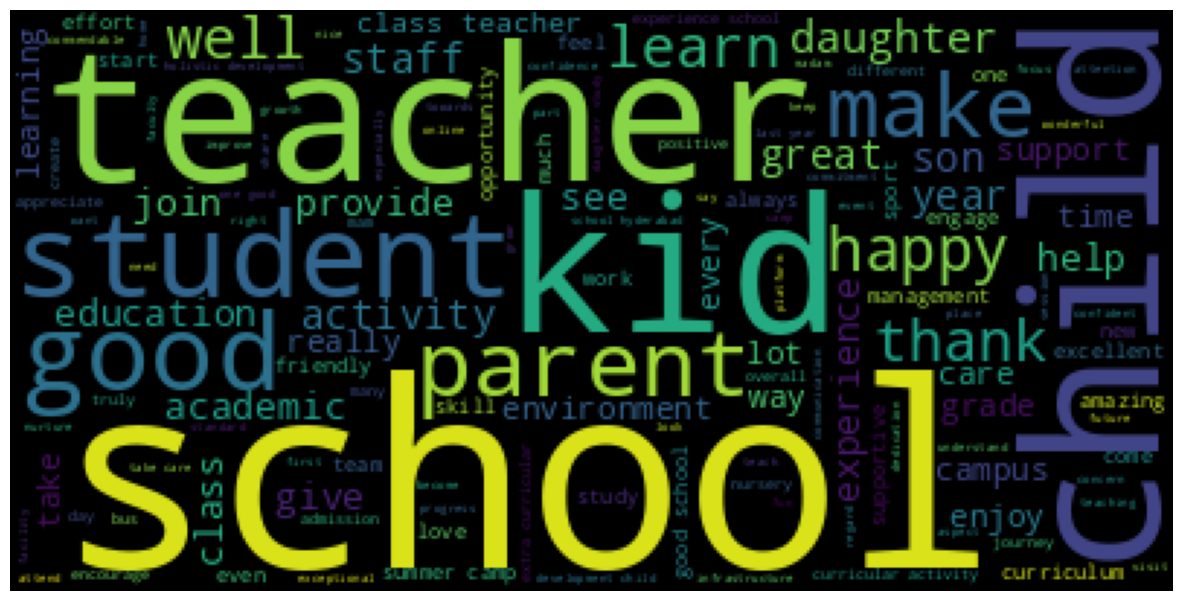

In [ ]:
cloud=WordCloud()
import matplotlib.pyplot as plt
cloud=cloud.generate(result)

plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis("off");


In [ ]:
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    n_grams = ngrams(words, n)
    n_grams = ['_'.join(gram) for gram in n_grams]  # Convert tuples to strings
    return Counter(n_grams)



In [ ]:
trigram=generate_ngrams(result,3)
for i,j in trigram.items():
    print(i,":",j)
    print("\n")

Streaming output truncated to the last 5000 lines.


mun_boston_school : 1


boston_school_aim : 1


school_aim_provide : 1


aim_provide_holistic : 1


development_child_addition : 1


child_addition_academic : 1


addition_academic_excellence : 1


academic_excellence_excited : 1


excellence_excited_visit : 1


excited_visit_mit : 1


visit_mit_share : 1


mit_share_learn : 1


share_learn_mit : 1


learn_mit_nord : 1


mit_nord_anglia : 1


nord_anglia_also : 1


anglia_also_look : 1


also_look_forward : 1


look_forward_part : 1


forward_part_steam : 1


part_steam_mit : 1


steam_mit_son : 1


mit_son_oak : 1


son_oak_codef : 1


oak_codef_game : 1


codef_game_guardians : 1


game_guardians_ocean : 1


guardians_ocean_raise : 1


ocean_raise_awareness : 1


raise_awareness_plastic : 1


awareness_plastic_pollution : 1


plastic_pollution_ocean : 1


pollution_ocean_school : 1


ocean_school_instil : 1


school_instil_importance : 1


instil_importance_preservation : 1


impor

In [ ]:
bigram=generate_ngrams(result,2)
for i,j in bigram.items():
    print(i,":",j)
    print("\n")

Streaming output truncated to the last 5000 lines.


home_online : 1


class_improve : 1


improve_every : 1


every_session : 1


session_become : 1


become_like : 1


daily_ritual : 1


ritual_participate : 1


participate_since : 1


since_since : 1


since_week : 2


week_teacher : 1


teacher_actively : 1


actively_participate : 1


participate_take : 1


child_creditability : 1


creditability_assess : 1


assess_accordance : 1


accordance_grasp : 1


grasp_capability : 1


capability_great : 1


great_initiative : 2


initiative_school : 2


make_believe : 1


learning_stop : 1


stop_visit : 1


school_bachhupally : 1


bachhupally_mivaan : 1


mivaan_grade : 1


grade_admission : 1


admission_inquiry : 1


inquiry_must : 1


say_admission : 1


admission_counsellor : 1


counsellor_anitha : 1


anitha_extremely : 1


extremely_outstanding : 1


outstanding_amicable : 1


amicable_nature : 1


nature_support : 1


support_follow : 1


follow_through : 1


through_give : 1



In [ ]:
def create_wordcloud(ngrams_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(ngrams_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()


In [ ]:
trigram

Counter({'summer_camp_hit': 1,
         'camp_hit_child': 1,
         'hit_child_early': 1,
         'child_early_morning': 1,
         'early_morning_problem': 1,
         'morning_problem_thank': 1,
         'problem_thank_exciting': 1,
         'thank_exciting_activity': 1,
         'exciting_activity_hand': 1,
         'activity_hand_learn': 1,
         'hand_learn_swimming': 1,
         'learn_swimming_archery': 1,
         'swimming_archery_dance': 1,
         'archery_dance_stem': 1,
         'dance_stem_camp': 1,
         'stem_camp_keep': 1,
         'camp_keep_engage': 1,
         'keep_engage_energize': 1,
         'engage_energize_day': 1,
         'energize_day_long': 1,
         'day_long_fun': 1,
         'long_fun_stop': 1,
         'fun_stop_pick': 1,
         'stop_pick_love': 1,
         'pick_love_recounting': 1,
         'love_recounting_adventure': 1,
         'recounting_adventure_friend': 1,
         'adventure_friend_teacher': 1,
         'friend_teacher_keep':

In [ ]:

import numpy as np

trigram_keys_array = np.array(list(trigram.keys()))
print(trigram_keys_array)


['summer_camp_hit' 'camp_hit_child' 'hit_child_early' ...
 'school_good_education' 'good_education_excellent'
 'education_excellent_exceptional']


In [ ]:
import numpy as np

bigram_keys_array = np.array(list(bigram.keys()))
print(bigram_keys_array)

import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data files (if not already downloaded)
nltk.download('punkt')

# Sample dictionary with text keys


# Function to tokenize each key
def tokenize_list_of_strings(strings):
    tokenized_list = [word_tokenize(string) for string in strings]
    return tokenized_list

# Tokenize the list of strings
tokenized_bigram_strings = tokenize_list_of_strings(bigram_keys_array)
print(tokenized_bigram_strings)

['summer_camp' 'camp_hit' 'hit_child' ... 'campus_excellent'
 'education_excellent' 'excellent_exceptional']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['summer_camp'], ['camp_hit'], ['hit_child'], ['child_early'], ['early_morning'], ['morning_problem'], ['problem_thank'], ['thank_exciting'], ['exciting_activity'], ['activity_hand'], ['hand_learn'], ['learn_swimming'], ['swimming_archery'], ['archery_dance'], ['dance_stem'], ['stem_camp'], ['camp_keep'], ['keep_engage'], ['engage_energize'], ['energize_day'], ['day_long'], ['long_fun'], ['fun_stop'], ['stop_pick'], ['pick_love'], ['love_recounting'], ['recounting_adventure'], ['adventure_friend'], ['friend_teacher'], ['teacher_keep'], ['keep_excitement'], ['excitement_alive'], ['alive_bum'], ['bum_program'], ['program_end'], ['end_soon'], ['soon_fly'], ['fly_big'], ['big_thank'], ['thank_entire'], ['entire_team'], ['team_create'], ['create_well'], ['well_rounded'], ['rounded_engage'], ['engage_program'], ['program_planning'], ['planning_transportation'], ['transportation_food'], ['food_activity'], ['activity_fantastic'], ['fantastic_especially'], ['especially_appreciate'], ['apprecia

In [ ]:
import numpy as np

trigram_keys_array = np.array(list(trigram.keys()))
print(trigram_keys_array)

import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data files (if not already downloaded)
nltk.download('punkt')

# Sample dictionary with text keys


# Function to tokenize each key
def tokenize_list_of_strings(strings):
    tokenized_list = [word_tokenize(string) for string in strings]
    return tokenized_list

# Tokenize the list of strings
tokenized_trigram_strings = tokenize_list_of_strings(trigram_keys_array)
print(tokenized_trigram_strings)

['summer_camp_hit' 'camp_hit_child' 'hit_child_early' ...
 'school_good_education' 'good_education_excellent'
 'education_excellent_exceptional']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['summer_camp_hit'], ['camp_hit_child'], ['hit_child_early'], ['child_early_morning'], ['early_morning_problem'], ['morning_problem_thank'], ['problem_thank_exciting'], ['thank_exciting_activity'], ['exciting_activity_hand'], ['activity_hand_learn'], ['hand_learn_swimming'], ['learn_swimming_archery'], ['swimming_archery_dance'], ['archery_dance_stem'], ['dance_stem_camp'], ['stem_camp_keep'], ['camp_keep_engage'], ['keep_engage_energize'], ['engage_energize_day'], ['energize_day_long'], ['day_long_fun'], ['long_fun_stop'], ['fun_stop_pick'], ['stop_pick_love'], ['pick_love_recounting'], ['love_recounting_adventure'], ['recounting_adventure_friend'], ['adventure_friend_teacher'], ['friend_teacher_keep'], ['teacher_keep_excitement'], ['keep_excitement_alive'], ['excitement_alive_bum'], ['alive_bum_program'], ['bum_program_end'], ['program_end_soon'], ['end_soon_fly'], ['soon_fly_big'], ['fly_big_thank'], ['big_thank_entire'], ['thank_entire_team'], ['entire_team_create'], ['team_create

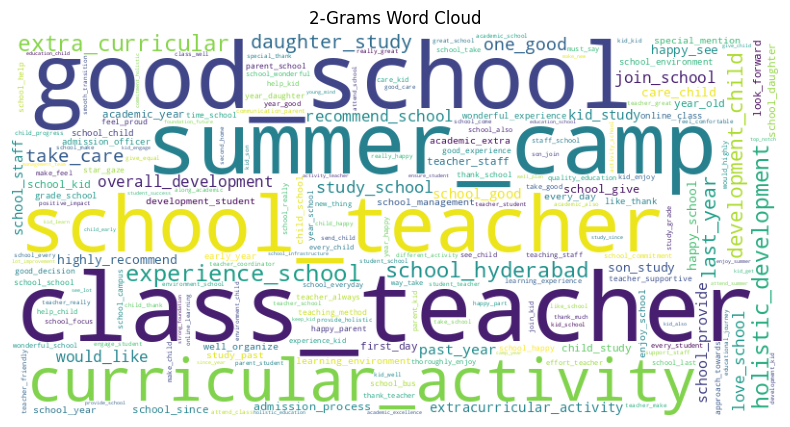

In [ ]:


# Generate 2-grams and 3-grams
bigrams_counts = generate_ngrams(result, 2)
trigrams_counts = generate_ngrams(result, 3)

# Create word clouds
create_wordcloud(bigrams_counts, '2-Grams Word Cloud')



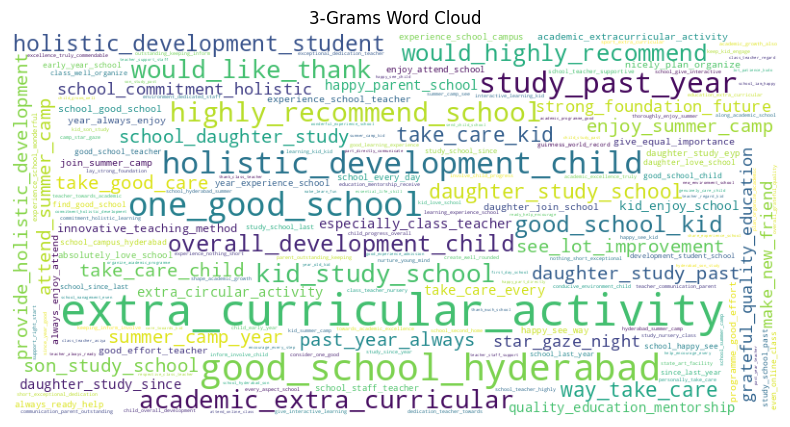

In [ ]:
create_wordcloud(trigrams_counts, '3-Grams Word Cloud')

# Performing LDA

In [ ]:
# Gensim
!pip install gensim
!pip install spacy

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
result

'summer camp hit child early morning problem thank exciting activity hand learn swimming archery dance stem camp keep engage energize day long fun stop pick love recounting adventure friend teacher keep excitement alive bum program end soon fly big thank entire team create well rounded engage program planning transportation food activity fantastic especially appreciate vinaya mam patience care child throughout camp hope see program like future absolutely thrilled school summer camp son blast eagerly share learn dance step art craft steam class even sport like swimming basketball special mention stargazing activity parent get enjoy see saturn ring moon close alongside kids transportation food top notch impress overall organization well organize school child like archery tape tune swimming activity lunch transportation good stargazing stand big shout team organize help kid understand basic kudo team mary mam take care kid well delight express utmost satisfaction school especially eypc cl

In [ ]:
#converting string into list
def convert(string):
    li = list(string.split(" "))
    return li

text_final=convert(result)

In [ ]:
text_final[0]

'summer'

In [ ]:
# # Create Dictionary
# id2word = corpora.Dictionary(result)

# # Create Corpus: Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in result]

# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=4,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=10,
#                                            passes=10,
#                                            alpha='symmetric',
#                                            iterations=100,
#                                            per_word_topics=True)

# print(lda_model.print_topics())

In [ ]:
# Step 1: Import necessary libraries
import gensim
from gensim import corpora
import pprint


# Example preprocessing (tokenization)

from nltk.tokenize import word_tokenize


# Tokenize words
tokenized_text = [word_tokenize(text.lower()) for text in text_final]


# Step 3: Create a dictionary and corpus
id2word = corpora.Dictionary(tokenized_text)
corpus = [id2word.doc2bow(doc) for doc in tokenized_text]

# Step 4: Train the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=4,
                   random_state=100,
                   update_every=1,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

# Step 5: Print the topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.208*"school" + 0.031*"well" + 0.025*"daughter" + 0.022*"experience" + '
  '0.020*"study" + 0.018*"amazing" + 0.017*"hyderabad" + 0.013*"curriculum" + '
  '0.013*"nice" + 0.011*"time"'),
 (1,
  '0.063*"good" + 0.059*"kid" + 0.047*"teacher" + 0.024*"staff" + '
  '0.020*"education" + 0.017*"excellent" + 0.017*"work" + 0.016*"year" + '
  '0.016*"class" + 0.015*"admission"'),
 (2,
  '0.030*"thank" + 0.028*"parent" + 0.024*"make" + 0.023*"management" + '
  '0.021*"would" + 0.021*"learn" + 0.020*"one" + 0.018*"also" + '
  '0.018*"support" + 0.018*"new"'),
 (3,
  '0.057*"child" + 0.049*"student" + 0.033*"see" + 0.029*"great" + '
  '0.025*"team" + 0.020*"give" + 0.019*"lot" + 0.019*"get" + 0.013*"many" + '
  '0.012*"enjoy"')]


In [ ]:
corpus

[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)],
 [(10, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1)],
 [(14, 1)],
 [(15, 1)],
 [(1, 1)],
 [(16, 1)],
 [(17, 1)],
 [(18, 1)],
 [(19, 1)],
 [(20, 1)],
 [(21, 1)],
 [(22, 1)],
 [(23, 1)],
 [(24, 1)],
 [(25, 1)],
 [(26, 1)],
 [(27, 1)],
 [(28, 1)],
 [(16, 1)],
 [(29, 1)],
 [(30, 1)],
 [(31, 1)],
 [(32, 1)],
 [(33, 1)],
 [(34, 1)],
 [(35, 1)],
 [(36, 1)],
 [(7, 1)],
 [(37, 1)],
 [(38, 1)],
 [(39, 1)],
 [(40, 1)],
 [(41, 1)],
 [(17, 1)],
 [(32, 1)],
 [(42, 1)],
 [(43, 1)],
 [(44, 1)],
 [(9, 1)],
 [(45, 1)],
 [(46, 1)],
 [(47, 1)],
 [(48, 1)],
 [(49, 1)],
 [(50, 1)],
 [(51, 1)],
 [(3, 1)],
 [(52, 1)],
 [(1, 1)],
 [(53, 1)],
 [(54, 1)],
 [(32, 1)],
 [(55, 1)],
 [(56, 1)],
 [(57, 1)],
 [(58, 1)],
 [(59, 1)],
 [(0, 1)],
 [(1, 1)],
 [(60, 1)],
 [(61, 1)],
 [(62, 1)],
 [(63, 1)],
 [(11, 1)],
 [(14, 1)],
 [(64, 1)],
 [(65, 1)],
 [(66, 1)],
 [(67, 1)],
 [(68, 1)],
 [(69, 1)],
 [(70, 1)],
 [(55, 1)

In [ ]:
id2word[0]

'summer'

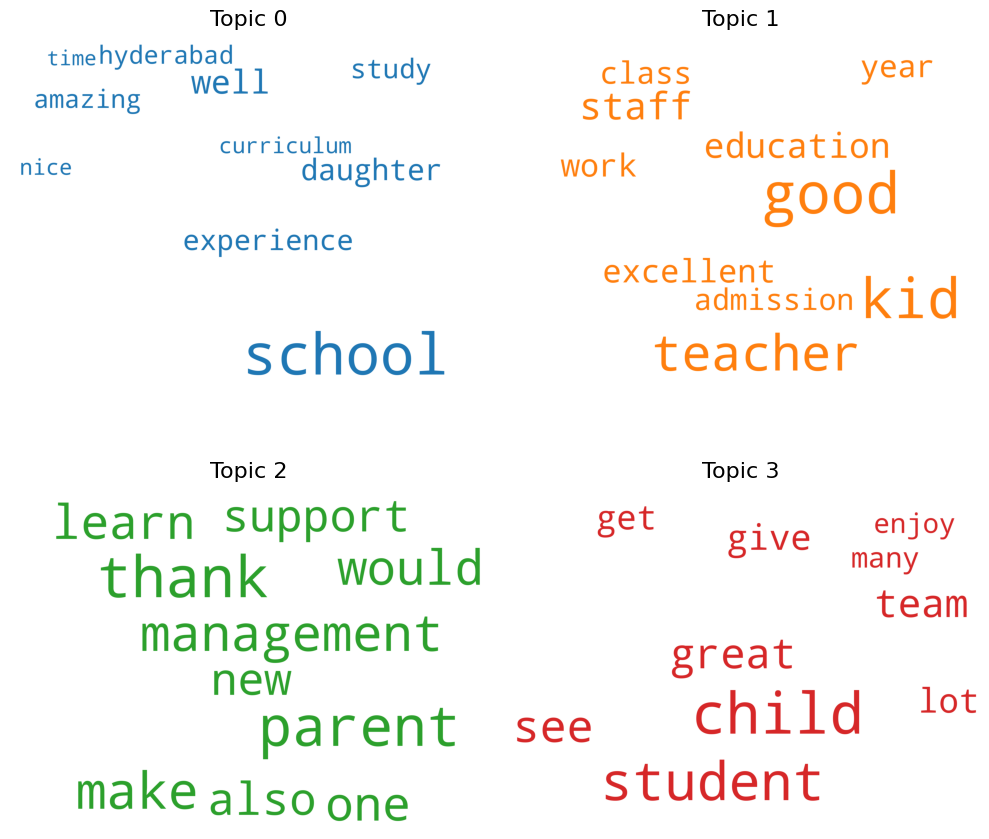

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Bigram LDA


In [ ]:
tokenized_bigram_strings

[['summer_camp'],
 ['camp_hit'],
 ['hit_child'],
 ['child_early'],
 ['early_morning'],
 ['morning_problem'],
 ['problem_thank'],
 ['thank_exciting'],
 ['exciting_activity'],
 ['activity_hand'],
 ['hand_learn'],
 ['learn_swimming'],
 ['swimming_archery'],
 ['archery_dance'],
 ['dance_stem'],
 ['stem_camp'],
 ['camp_keep'],
 ['keep_engage'],
 ['engage_energize'],
 ['energize_day'],
 ['day_long'],
 ['long_fun'],
 ['fun_stop'],
 ['stop_pick'],
 ['pick_love'],
 ['love_recounting'],
 ['recounting_adventure'],
 ['adventure_friend'],
 ['friend_teacher'],
 ['teacher_keep'],
 ['keep_excitement'],
 ['excitement_alive'],
 ['alive_bum'],
 ['bum_program'],
 ['program_end'],
 ['end_soon'],
 ['soon_fly'],
 ['fly_big'],
 ['big_thank'],
 ['thank_entire'],
 ['entire_team'],
 ['team_create'],
 ['create_well'],
 ['well_rounded'],
 ['rounded_engage'],
 ['engage_program'],
 ['program_planning'],
 ['planning_transportation'],
 ['transportation_food'],
 ['food_activity'],
 ['activity_fantastic'],
 ['fantastic_

In [ ]:
# Step 1: Import necessary libraries
import gensim
from gensim import corpora
import pprint



# Step 2: Create a dictionary and corpus
id2word = corpora.Dictionary(tokenized_bigram_strings)
corpus = [id2word.doc2bow(doc) for doc in tokenized_bigram_strings]

# Step 3: Train the LDA model
lda_bigram_model = gensim.models.LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=4,
                   random_state=100,
                   update_every=1,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

# Step 4: Print the topics
pprint.pprint(lda_bigram_model.print_topics())
doc_bigram_lda = lda_bigram_model[corpus]


[(0,
  '0.002*"school_base" + 0.002*"good_aspect" + 0.002*"management_amazing" + '
  '0.002*"education_excellent" + 0.002*"goodmanagement_good" + '
  '0.002*"campus_excellent" + 0.002*"fee_good" + 0.002*"act_child" + '
  '0.002*"excellent_exceptional" + 0.002*"good_well"'),
 (1,
  '0.002*"education_beautiful" + 0.002*"good_construction" + '
  '0.002*"standard_driver" + 0.002*"organize_manage" + '
  '0.002*"drive_recklessly" + 0.002*"education_excellent" + '
  '0.002*"teacher_standard" + 0.002*"construction_goodmanagement" + '
  '0.002*"base_standard" + 0.002*"study_act"'),
 (2,
  '0.002*"school_base" + 0.002*"study_act" + 0.002*"board_nice" + '
  '0.002*"study_waste" + 0.002*"kid_board" + 0.002*"standard_infrastructure" + '
  '0.002*"school_holistic" + 0.002*"management_amazing" + 0.002*"aspect_nice" '
  '+ 0.002*"construction_goodmanagement"'),
 (3,
  '0.002*"good_aspect" + 0.002*"organize_manage" + 0.002*"nice_campus" + '
  '0.002*"teacher_standard" + 0.002*"manage_nice" + 0.002*"rec

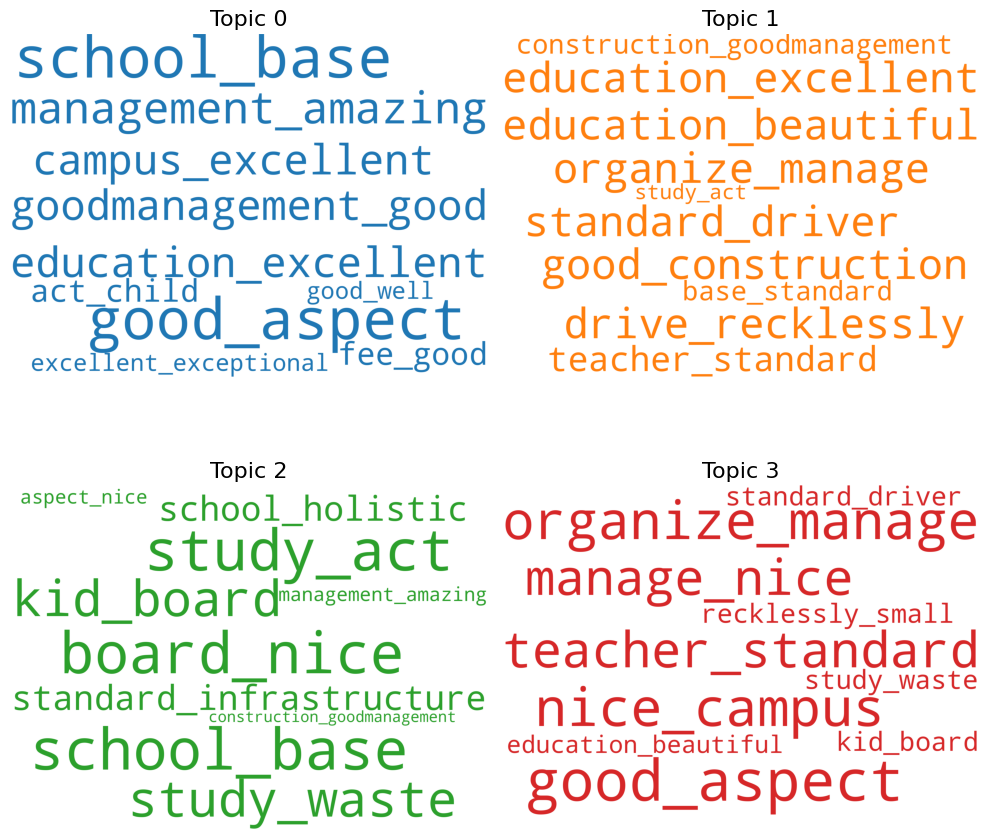

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_bigram_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# trigram lda model

In [ ]:
tokenized_trigram_strings

[['summer_camp_hit'],
 ['camp_hit_child'],
 ['hit_child_early'],
 ['child_early_morning'],
 ['early_morning_problem'],
 ['morning_problem_thank'],
 ['problem_thank_exciting'],
 ['thank_exciting_activity'],
 ['exciting_activity_hand'],
 ['activity_hand_learn'],
 ['hand_learn_swimming'],
 ['learn_swimming_archery'],
 ['swimming_archery_dance'],
 ['archery_dance_stem'],
 ['dance_stem_camp'],
 ['stem_camp_keep'],
 ['camp_keep_engage'],
 ['keep_engage_energize'],
 ['engage_energize_day'],
 ['energize_day_long'],
 ['day_long_fun'],
 ['long_fun_stop'],
 ['fun_stop_pick'],
 ['stop_pick_love'],
 ['pick_love_recounting'],
 ['love_recounting_adventure'],
 ['recounting_adventure_friend'],
 ['adventure_friend_teacher'],
 ['friend_teacher_keep'],
 ['teacher_keep_excitement'],
 ['keep_excitement_alive'],
 ['excitement_alive_bum'],
 ['alive_bum_program'],
 ['bum_program_end'],
 ['program_end_soon'],
 ['end_soon_fly'],
 ['soon_fly_big'],
 ['fly_big_thank'],
 ['big_thank_entire'],
 ['thank_entire_team']

In [ ]:
# Step 1: Import necessary libraries
import gensim
from gensim import corpora
import pprint



# Step 2: Create a dictionary and corpus
id2word = corpora.Dictionary(tokenized_trigram_strings)
corpus = [id2word.doc2bow(doc) for doc in tokenized_trigram_strings]

# Step 3: Train the LDA model
lda_trigram_model = gensim.models.LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=4,
                   random_state=100,
                   update_every=1,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

# Step 4: Print the topics
pprint.pprint(lda_trigram_model.print_topics())
doc_trigram_lda = lda_trigram_model[corpus]


[(0,
  '0.001*"base_standard_driver" + 0.001*"good_aspect_nice" + '
  '0.001*"become_bad_addressing" + 0.001*"answer_call_atleast" + '
  '0.001*"back_look_admission" + 0.001*"education_excellent_exceptional" + '
  '0.001*"good_school_base" + 0.001*"excellent_school_good" + '
  '0.001*"teacher_try_reach" + 0.001*"look_admission_recently"'),
 (1,
  '0.001*"good_construction_goodmanagement" + 0.001*"aspect_nice_school" + '
  '0.001*"good_aspect_nice" + 0.001*"become_bad_addressing" + '
  '0.001*"well_organize_manage" + 0.001*"nice_highly_impressed" + '
  '0.001*"base_standard_driver" + 0.001*"concern_raise_nice" + '
  '0.001*"campus_management_amazing" + '
  '0.001*"teacher_standard_infrastructure"'),
 (2,
  '0.001*"answer_call_atleast" + 0.001*"school_great_teacher" + '
  '0.001*"school_good_well" + 0.001*"nice_highly_impressed" + '
  '0.001*"school_good_education" + 0.001*"impressed_campus_management" + '
  '0.001*"good_construction_goodmanagement" + 0.001*"school_study_act" + '
  '0.00

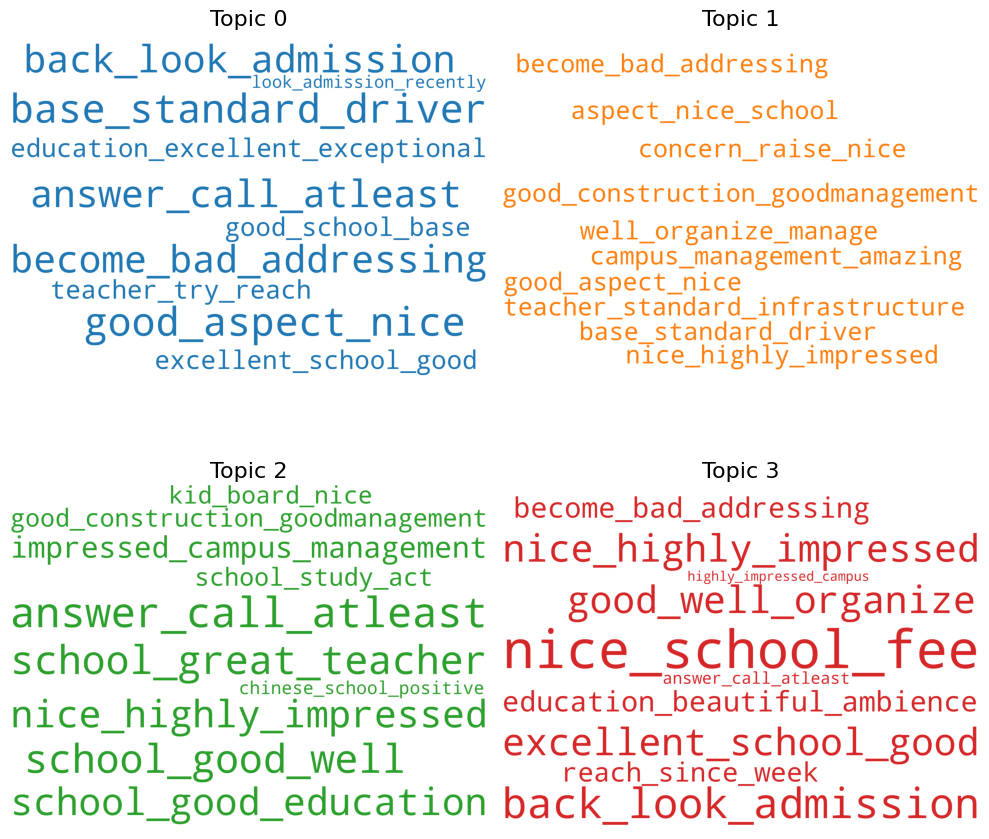

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_trigram_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# # Step 1: Install pyLDAvis and update pandas
# !pip install --upgrade pyLDAvis pandas

# # Step 2: Import the necessary libraries
# import pyLDAvis.gensim_models
# import pyLDAvis
# pyLDAvis.enable_notebook()

# # Assuming lda_model, corpus, and dictionary are already defined
# pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)



In [ ]:
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=10,
#                                            passes=10,
#                                            alpha='symmetric',
#                                            iterations=100,
#                                            per_word_topics=True)

# Applying Tf-idf

In [ ]:
df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  \
0  The Oakridge summer camp was a hit with our ch...   
1  Absolutely thrilled with Oakridge School's sum...   
2  Very well organized  at oakridge international...   
3  I am delighted to express my utmost satisfacti...   
4  My son is attending summer camp this year at O...   

                                             cleaned  
0    oakridge summer camp   hit    child early mo...  
1  absolutely thrilled   oakridge school summer c...  
2    well organize oakridge international school ...  
3  delight express utmost satisfaction   oakridge...  
4  son attend summer camp   year oakridge campus ...

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk import word_tokenize
# from nltk.util import ngrams
# import nltk

# # Download necessary NLTK data
# nltk.download('punkt')

# # Tokenization function to extract unigrams, bigrams, and trigrams
# def tokenize(text):
#     tokens = word_tokenize(text)  # tokenize into words
#     tokens_bigrams = [' '.join(bg) for bg in list(ngrams(tokens, 2))]  # create bigrams
#     tokens_trigrams = [' '.join(tg) for tg in list(ngrams(tokens, 3))]  # create trigrams
#     return tokens + tokens_bigrams + tokens_trigrams

# # TF-IDF Vectorization
# tfidf = TfidfVectorizer(tokenizer=tokenize)
# tfidf_matrix = tfidf.fit_transform(df['cleaned'])

# # Get feature names (n-grams) from TF-IDF vectorizer
# feature_names = tfidf.get_feature_names_out()

# # Extracting keywords and their TF-IDF scores for each row in the DataFrame
# keywords_list = []
# keyword_sorted=[]
# only_keywords_list = []

# for i, row in df.iterrows():
#     feature_index = tfidf_matrix[i, :].nonzero()[1]
#     tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
#     keywords = [(feature_names[i], s) for (i, s) in tfidf_scores]

#     # Sort keywords by TF-IDF score in descending order
#     # keywords_sorted = sorted(keywords, key=lambda x: x[1], reverse=True)

#     # Extract only the keywords
#     only_keywords = [w for w, s in keywords]

#     keywords_list.append(keywords)
#     only_keywords_list.append(only_keywords)

# # Adding keywords and TF-IDF scores to DataFrame
# df['keywords_tfidf'] = keywords_list
# df['keywords'] = only_keywords_list
# # df['keyword_sorted']=keyword_sorted

# # Display DataFrame with keywords and TF-IDF scores
# print(df[['cleaned', 'keywords_tfidf', 'keywords']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                                               cleaned  \
0      oakridge summer camp   hit    child early mo...   
1    absolutely thrilled   oakridge school summer c...   
2      well organize oakridge international school ...   
3    delight express utmost satisfaction   oakridge...   
4    son attend summer camp   year oakridge campus ...   
..                                                 ...   
359                                        nice campus   
360                                   excellent school   
361                                     good education   
362                                          excellent   
363                                        exceptional   

                                        keywords_tfidf  \
0    [(program like future, 0.0771383594263494), (s...   
1    [(impress overall organization, 0.097576372831...   
2    [(care kid well, 0.11659012588565205), (take c...   
3    [(foundation future success, 0.088004715285682...   
4    [(arrang

In [ ]:
# feature_names[0:10]

array(['aadhya', 'aadhya incredible', 'aadhya incredible time',
       'aadhya join', 'aadhya join grade', 'aadhya particularly',
       'aadhya particularly love', 'aadhya reddy', 'aadhya reddy enjoy',
       'aaradhya'], dtype=object)

In [ ]:
# df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  \
0  The Oakridge summer camp was a hit with our ch...   
1  Absolutely thrilled with Oakridge School's sum...   
2  Very well organized  at oakridge international...   
3  I am delighted to express my utmost satisfacti...   
4  My son is attending summer camp this year at O...   

                                             cleaned  \
0    oakridge summer camp   hit    child early mo...   
1  absolutely thrilled   oakridge school summer c...   
2    well organize oakridge international school ...   
3  delight express utmost satisfaction   oakridge...   
4  son attend summer camp   year oakridge campus ...   

                                      keywords_tfidf  \
0  [(program like future, 0.0771383594263494), (s...   
1  [(impress overall organization, 0.097576372831...   
2  [(care kid well, 0.11659012588565205), (take c...   
3  [(foundation future success, 0.088004715285682...   
4  [(arrange last week, 0.09734403448263432), (ni...   

                                            keywords  
0  [program like future, see program like, hope s...  
1  [impress overall organization, notch impress o...  
2  [care kid well, take care kid, mam take care, ...  
3  [foundation future success, strong foundation ...  
4  [arrange last week, night arrange last, gaze n...

In [ ]:
# df['keywords'][0]

['program like future',
 'see program like',
 'hope see program',
 'camp hope see',
 'throughout camp hope',
 'child throughout camp',
 'care child throughout',
 'patience care child',
 'mam patience care',
 'vinaya mam patience',
 'appreciate vinaya mam',
 'especially appreciate vinaya',
 'fantastic especially appreciate',
 'activity fantastic especially',
 'food activity fantastic',
 'transportation food activity',
 'planning transportation food',
 'program planning transportation',
 'engage program planning',
 'rounded engage program',
 'well rounded engage',
 'create well rounded',
 'team create well',
 'entire team create',
 'thank entire team',
 'big thank entire',
 'fly big thank',
 'soon fly big',
 'end soon fly',
 'program end soon',
 'bum program end',
 'alive bum program',
 'excitement alive bum',
 'keep excitement alive',
 'teacher keep excitement',
 'friend teacher keep',
 'adventure friend teacher',
 'recounting adventure friend',
 'love recounting adventure',
 'pick love

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk import word_tokenize
# from nltk.util import ngrams


# # TF-IDF Vectorization
# tfidf = TfidfVectorizer(tokenizer=tokenize)
# tfidf_matrix = tfidf.fit_transform(df['cleaned'])

# # Get feature names (n-grams) from TF-IDF vectorizer
# feature_names = tfidf.get_feature_names_out()

# # Extracting keywords and their TF-IDF scores for each row in the DataFrame
# keywords_list = []
# for i, row in df.iterrows():
#     feature_index = tfidf_matrix[i,:].nonzero()[1]
#     tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])

#     # Sort keywords by their TF-IDF score in descending order and trim scores
#     keywords = sorted([(feature_names[idx], score) for idx, score in tfidf_scores], key=lambda x: x[1], reverse=True)
#     keywords_trimmed = [(word, round(score, 3)) for word, score in keywords[:15]]  # Trim scores to 3 decimals

#     keywords_list.append(keywords_trimmed)

# # Adding keywords and TF-IDF scores to DataFrame
# df['keywords_tfidf_1'] = keywords_list

# # # Display DataFrame with cleaned text and keywords with TF-IDF scores
# # print(df[['cleaned', 'keywords_tfidf_1']])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  \
0  The Oakridge summer camp was a hit with our ch...   
1  Absolutely thrilled with Oakridge School's sum...   
2  Very well organized  at oakridge international...   
3  I am delighted to express my utmost satisfacti...   
4  My son is attending summer camp this year at O...   

                                             cleaned  \
0    oakridge summer camp   hit    child early mo...   
1  absolutely thrilled   oakridge school summer c...   
2    well organize oakridge international school ...   
3  delight express utmost satisfaction   oakridge...   
4  son attend summer camp   year oakridge campus ...   

                                      keywords_tfidf  \
0  [(program like future, 0.0771383594263494), (s...   
1  [(impress overall organization, 0.097576372831...   
2  [(care kid well, 0.11659012588565205), (take c...   
3  [(foundation future success, 0.088004715285682...   
4  [(arrange last week, 0.09734403448263432), (ni...   

                                            keywords  \
0  [program like future, see program like, hope s...   
1  [impress overall organization, notch impress o...   
2  [care kid well, take care kid, mam take care, ...   
3  [foundation future success, strong foundation ...   
4  [arrange last week, night arrange last, gaze n...   

                                    keywords_tfidf_1  
0  [(program, 0.159), (camp, 0.133), (keep, 0.096...  
1  [(impress overall organization, 0.098), (notch...  
2  [(organize, 0.153), (team, 0.127), (care kid w...  
3  [(nazia, 0.15), (foundation future success, 0....  
4  [(summer camp, 0.17), (camp, 0.168), (arrange,...

In [ ]:
# df['keywords_tfidf_1'][3]


[('nazia', 0.15),
 ('foundation future success', 0.088),
 ('believe lay strong', 0.088),
 ('firmly believe lay', 0.088),
 ('education firmly believe', 0.088),
 ('son education firmly', 0.088),
 ('oakridge son education', 0.088),
 ('impact oakridge son', 0.088),
 ('positive impact oakridge', 0.088),
 ('please positive impact', 0.088),
 ('genuinely please positive', 0.088),
 ('parent genuinely please', 0.088),
 ('development parent genuinely', 0.088),
 ('overall development parent', 0.088),
 ('environment child overall', 0.088)]

In [ ]:
# df.head()

user_review_no   rating      time_ago  comment_likes  \
0    73 reviews   5 stars   a month ago            NaN   
1        1 photo  5 stars   a month ago            NaN   
2        1 photo  5 stars   a month ago            NaN   
3        1 photo  5 stars  6 months ago            2.0   
4            NaN  5 stars   a month ago            NaN   

                                           user_text  \
0  The Oakridge summer camp was a hit with our ch...   
1  Absolutely thrilled with Oakridge School's sum...   
2  Very well organized  at oakridge international...   
3  I am delighted to express my utmost satisfacti...   
4  My son is attending summer camp this year at O...   

                                             cleaned  \
0    oakridge summer camp   hit    child early mo...   
1  absolutely thrilled   oakridge school summer c...   
2    well organize oakridge international school ...   
3  delight express utmost satisfaction   oakridge...   
4  son attend summer camp   year oakridge campus ...   

                                      keywords_tfidf  \
0  [(program like future, 0.0771383594263494), (s...   
1  [(impress overall organization, 0.097576372831...   
2  [(care kid well, 0.11659012588565205), (take c...   
3  [(foundation future success, 0.088004715285682...   
4  [(arrange last week, 0.09734403448263432), (ni...   

                                            keywords  \
0  [program like future, see program like, hope s...   
1  [impress overall organization, notch impress o...   
2  [care kid well, take care kid, mam take care, ...   
3  [foundation future success, strong foundation ...   
4  [arrange last week, night arrange last, gaze n...   

                                    keywords_tfidf_1  
0  [(program, 0.159), (camp, 0.133), (keep, 0.096...  
1  [(impress overall organization, 0.098), (notch...  
2  [(organize, 0.153), (team, 0.127), (care kid w...  
3  [(nazia, 0.15), (foundation future success, 0....  
4  [(summer camp, 0.17), (camp, 0.168), (arrange,...

# text **summerize**

In [ ]:
# result

'summer camp hit child early morning problem thank exciting activity hand learn swimming archery dance stem camp keep engage energize day long fun stop pick love recounting adventure friend teacher keep excitement alive bum program end soon fly big thank entire team create well rounded engage program planning transportation food activity fantastic especially appreciate vinaya mam patience care child throughout camp hope see program like future absolutely thrilled school summer camp son blast eagerly share learn dance step art craft steam class even sport like swimming basketball special mention stargazing activity parent get enjoy see saturn ring moon close alongside kids transportation food top notch impress overall organization well organize school child like archery tape tune swimming activity lunch transportation good stargazing stand big shout team organize help kid understand basic kudo team mary mam take care kid well delight express utmost satisfaction school especially eypc cl

In [ ]:
# len(result)

94461